In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test_path = '/content/drive/MyDrive/folder/emnist-letters-test.csv'
train_path = '/content/drive/MyDrive/folder/emnist-letters-train.csv'


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [7]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [8]:
train_set.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB


In [10]:
print(f"Train set shape:  {train_set.shape}")
print(f"Test set shape:  {test_set.shape}")

Train set shape:  (88799, 785)
Test set shape:  (14799, 785)


In [11]:
labels = train_set["23"].values

In [12]:
#train_set
y_train = np.array(train_set.iloc[:,0].values)
x_train = np.array(train_set.iloc[:,1:].values)
#test_set
y_test = np.array(test_set.iloc[:,0].values)
x_test = np.array(test_set.iloc[:,1:].values)
print(y_train.shape)
print(x_train.shape)

(88799,)
(88799, 784)


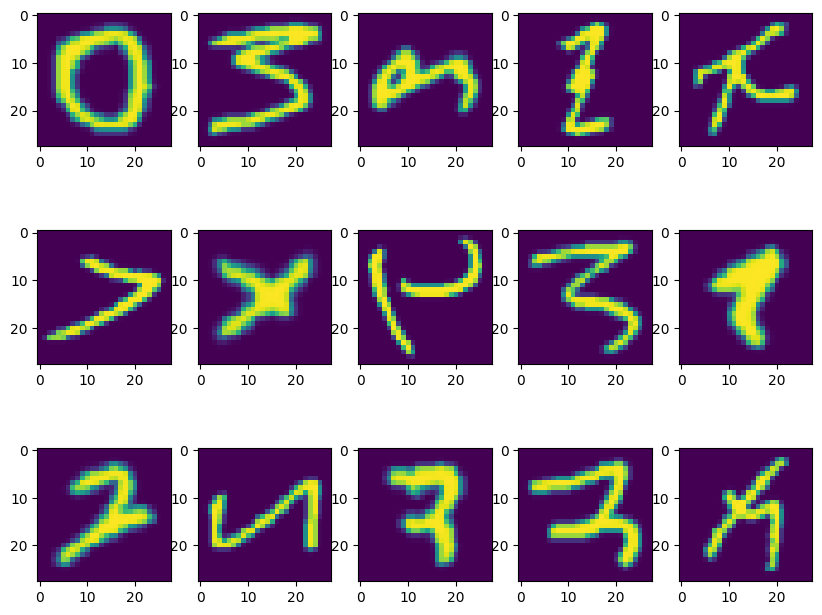

In [13]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i+2].reshape([28,28]))

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [15]:
# Transform labels
y_train = tf.keras.utils.to_categorical(y_train, 37)  # 37 classes (10 digits + 26 letters + 1 for unknown or garbage class)
y_test = tf.keras.utils.to_categorical(y_test, 37)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train ,test_size=0.2,random_state = 42)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(37,activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 512)           │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,433,765 (5.47 MB)

 Trainable params: 1,433,765 (5.47 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

In [19]:
early_stopping_callback= EarlyStopping(monitor='val_accuracy',
                                       min_delta=0,
                                       verbose=0,
                                       restore_best_weights = True,
                                       patience=3,
                                       mode='max')

In [20]:
epochs = 15
batch_size = 100

In [21]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                   verbose=1,
                   callbacks=[early_stopping_callback])

Epoch 1/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 235s 325ms/step - accuracy: 0.6503 - loss: 1.1696 - val_accuracy: 0.9069 - val_loss: 0.2833
Epoch 2/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 213s 299ms/step - accuracy: 0.9140 - loss: 0.2542 - val_accuracy: 0.9235 - val_loss: 0.2231
Epoch 3/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 266s 305ms/step - accuracy: 0.9320 - loss: 0.1979 - val_accuracy: 0.9304 - val_loss: 0.2064
Epoch 4/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 242s 278ms/step - accuracy: 0.9394 - loss: 0.1692 - val_accuracy: 0.9335 - val_loss: 0.1966
Epoch 5/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 204s 281ms/step - accuracy: 0.9460 - loss: 0.1459 - val_accuracy: 0.9324 - val_loss: 0.1971
Epoch 6/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 203s 286ms/step - accuracy: 0.9528 - loss: 0.1292 - val_accuracy: 0.9332 - val_loss: 0.1925
Epoch 7/15
711/711 ━━━━━━━━━━━━━━━━━━━━ 268s 294ms/step - accuracy: 0.9565 - loss: 0.1175 - val_accuracy: 0.9331 - val_loss: 0.2053


In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

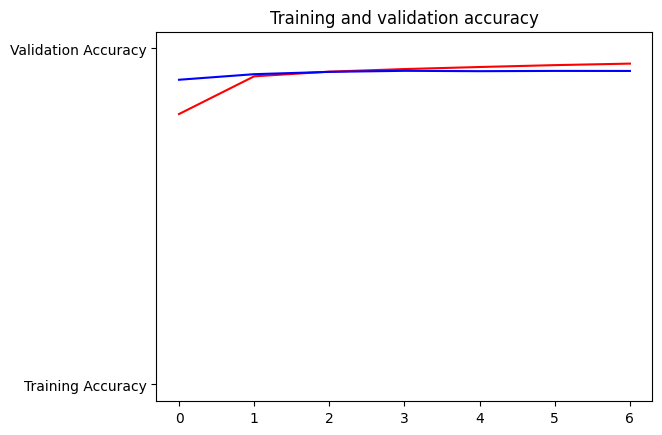

In [23]:
# Plot training and validation accuracy per epoch


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

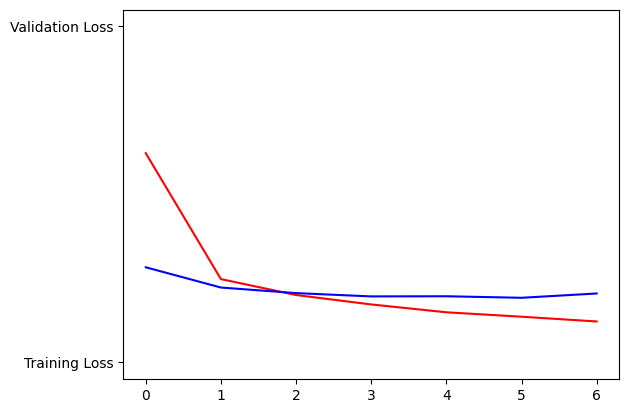

In [24]:
# Plot training and validation loss per epoch


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()